In [8]:
#ignorar warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Cargar el dataset

In [10]:
df = pd.read_csv('../csv/boston.csv')

# 2. Mostrar primeras filas, tipos de datos, nulos y duplicados

In [11]:
print("-----Primeras Filas del DataFrame-----")
print(df.head())


-----Primeras Filas del DataFrame-----
  OBS.;TOWN;TOWN#;TRACT;LON;LAT;MEDV;CMEDV;CRIM;ZN;INDUS;CHAS;NOX;RM;AGE;DIS;RAD;TAX;PTRATIO;B;LSTAT
0  1;Nahant;0;2011;-70.955.000;42.255.000;24.0;24...                                                
1  2;Swampscott;1;2021;-70.950.000;42.287.500;21....                                                
2  3;Swampscott;1;2022;-70.936.000;42.283.000;34....                                                
3  4;Marblehead;2;2031;-70.928.000;42.293.000;33....                                                
4  5;Marblehead;2;2032;-70.922.000;42.298.000;36....                                                


In [12]:
print("\n-----Información del DataFrame-----")
df.info()



-----Información del DataFrame-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column                                                                                              Non-Null Count  Dtype 
---  ------                                                                                              --------------  ----- 
 0   OBS.;TOWN;TOWN#;TRACT;LON;LAT;MEDV;CMEDV;CRIM;ZN;INDUS;CHAS;NOX;RM;AGE;DIS;RAD;TAX;PTRATIO;B;LSTAT  506 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [13]:
print("\n-----Valores Nulos -----")
print(df.isnull().sum())
print("\n-----Valores Duplicados------")
print(df.duplicated().sum())


-----Valores Nulos -----
OBS.;TOWN;TOWN#;TRACT;LON;LAT;MEDV;CMEDV;CRIM;ZN;INDUS;CHAS;NOX;RM;AGE;DIS;RAD;TAX;PTRATIO;B;LSTAT    0
dtype: int64

-----Valores Duplicados------
0


# 3. Estadísticas descriptivas


In [14]:
print("\n-----Estadísticas Descriptivas-----")
print(df.describe())
print(df.describe(include='object'))


-----Estadísticas Descriptivas-----
       OBS.;TOWN;TOWN#;TRACT;LON;LAT;MEDV;CMEDV;CRIM;ZN;INDUS;CHAS;NOX;RM;AGE;DIS;RAD;TAX;PTRATIO;B;LSTAT
count                                                 506                                                
unique                                                506                                                
top     506;Winthrop;91;1805;-70.982.500;42.221.000;11...                                                
freq                                                    1                                                
       OBS.;TOWN;TOWN#;TRACT;LON;LAT;MEDV;CMEDV;CRIM;ZN;INDUS;CHAS;NOX;RM;AGE;DIS;RAD;TAX;PTRATIO;B;LSTAT
count                                                 506                                                
unique                                                506                                                
top     506;Winthrop;91;1805;-70.982.500;42.221.000;11...                                                
freq     

# 4. Limpiar datos 

In [15]:

# Convertir el resto de columnas 'object' a numéricas, usando 'coerce' para manejar errores
numeric_cols_to_convert = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
for col in numeric_cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.drop(['OBS.', 'TOWN', 'TRACT', 'LON', 'LAT'], axis=1, inplace=True)

KeyError: 'CRIM'

In [ ]:
# Crear una lista de columnas con valores NaN
lista_nan = df.columns[df.isnull().any()].tolist()
print("Columnas con valores NaN:", lista_nan)

Columnas con valores NaN: ['CRIM']


In [ ]:
# Rellenar valores nulos con la media de cada columna
for col in lista_nan:
    df[col].fillna(df[col].mean(), inplace=True)

# Verificar que ya no hay valores nulos
print("-----Valores Nulos Después del Tratamiento-----")
print(df.isnull().sum())

-----Valores Nulos Después del Tratamiento-----
TOWN#      0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


# 4. Visualizaciones básicas

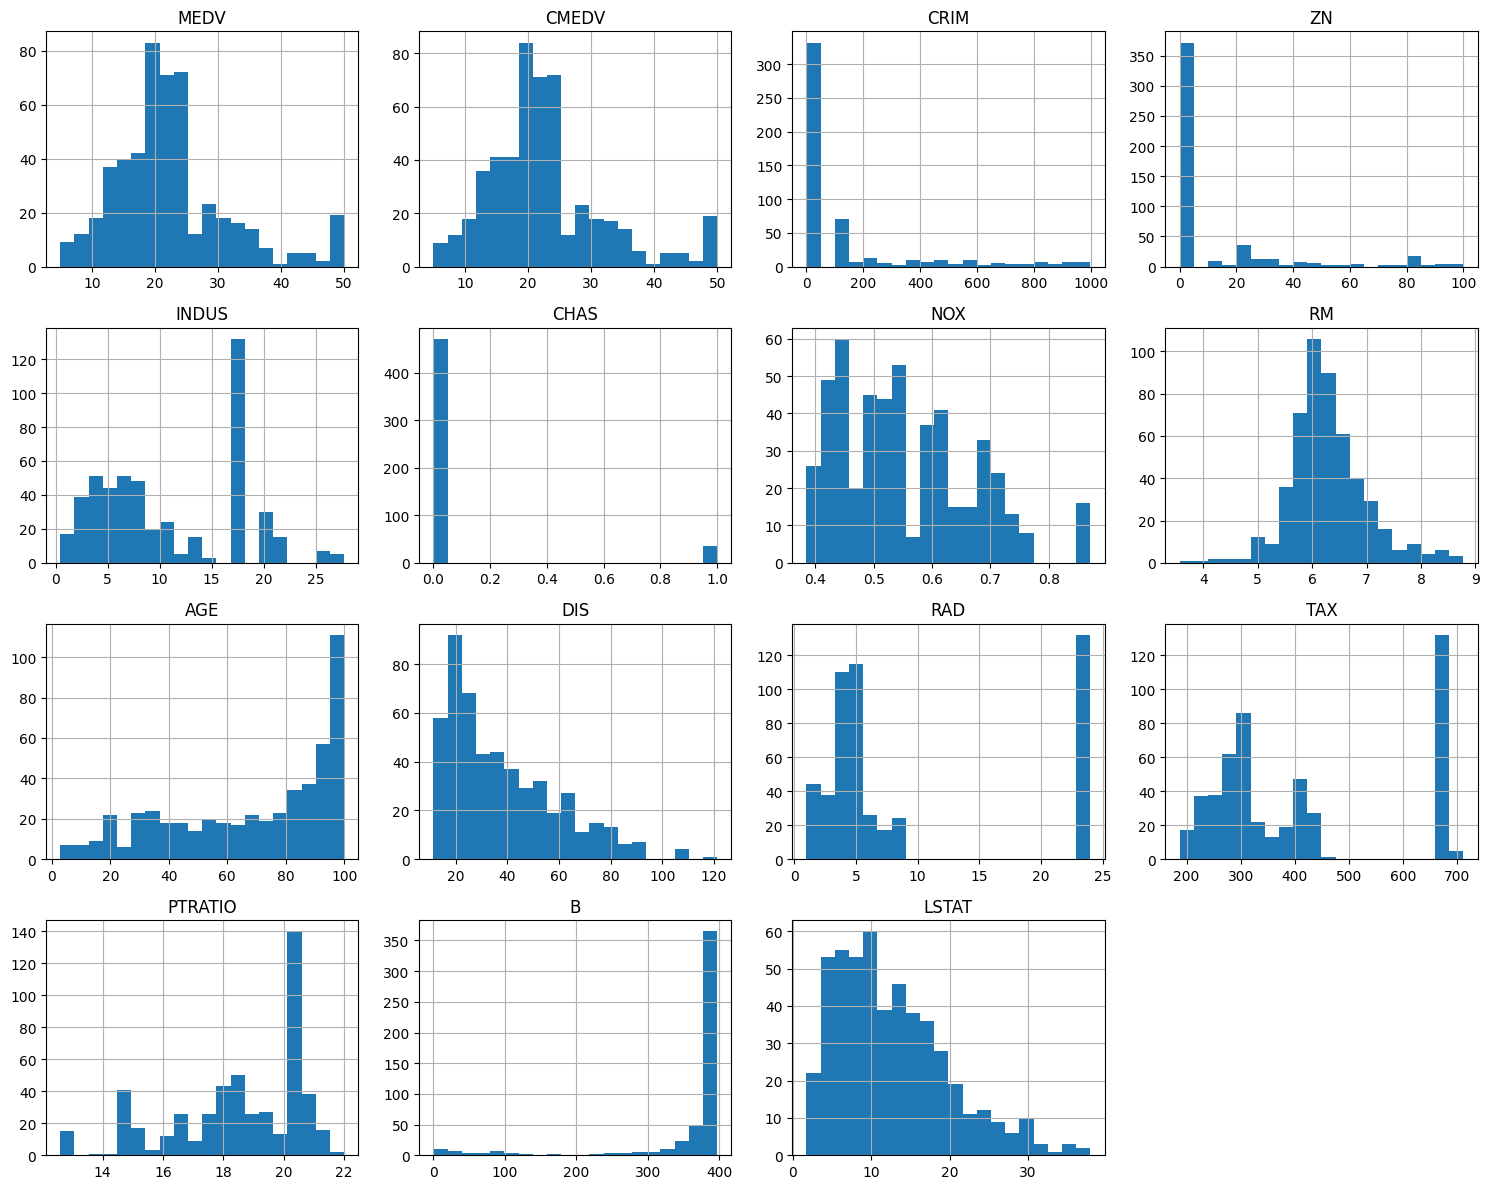

In [ ]:
# Seleccionar solo las columnas numéricas originales para visualización
original_numeric_cols = ['MEDV', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                         'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df[original_numeric_cols].hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

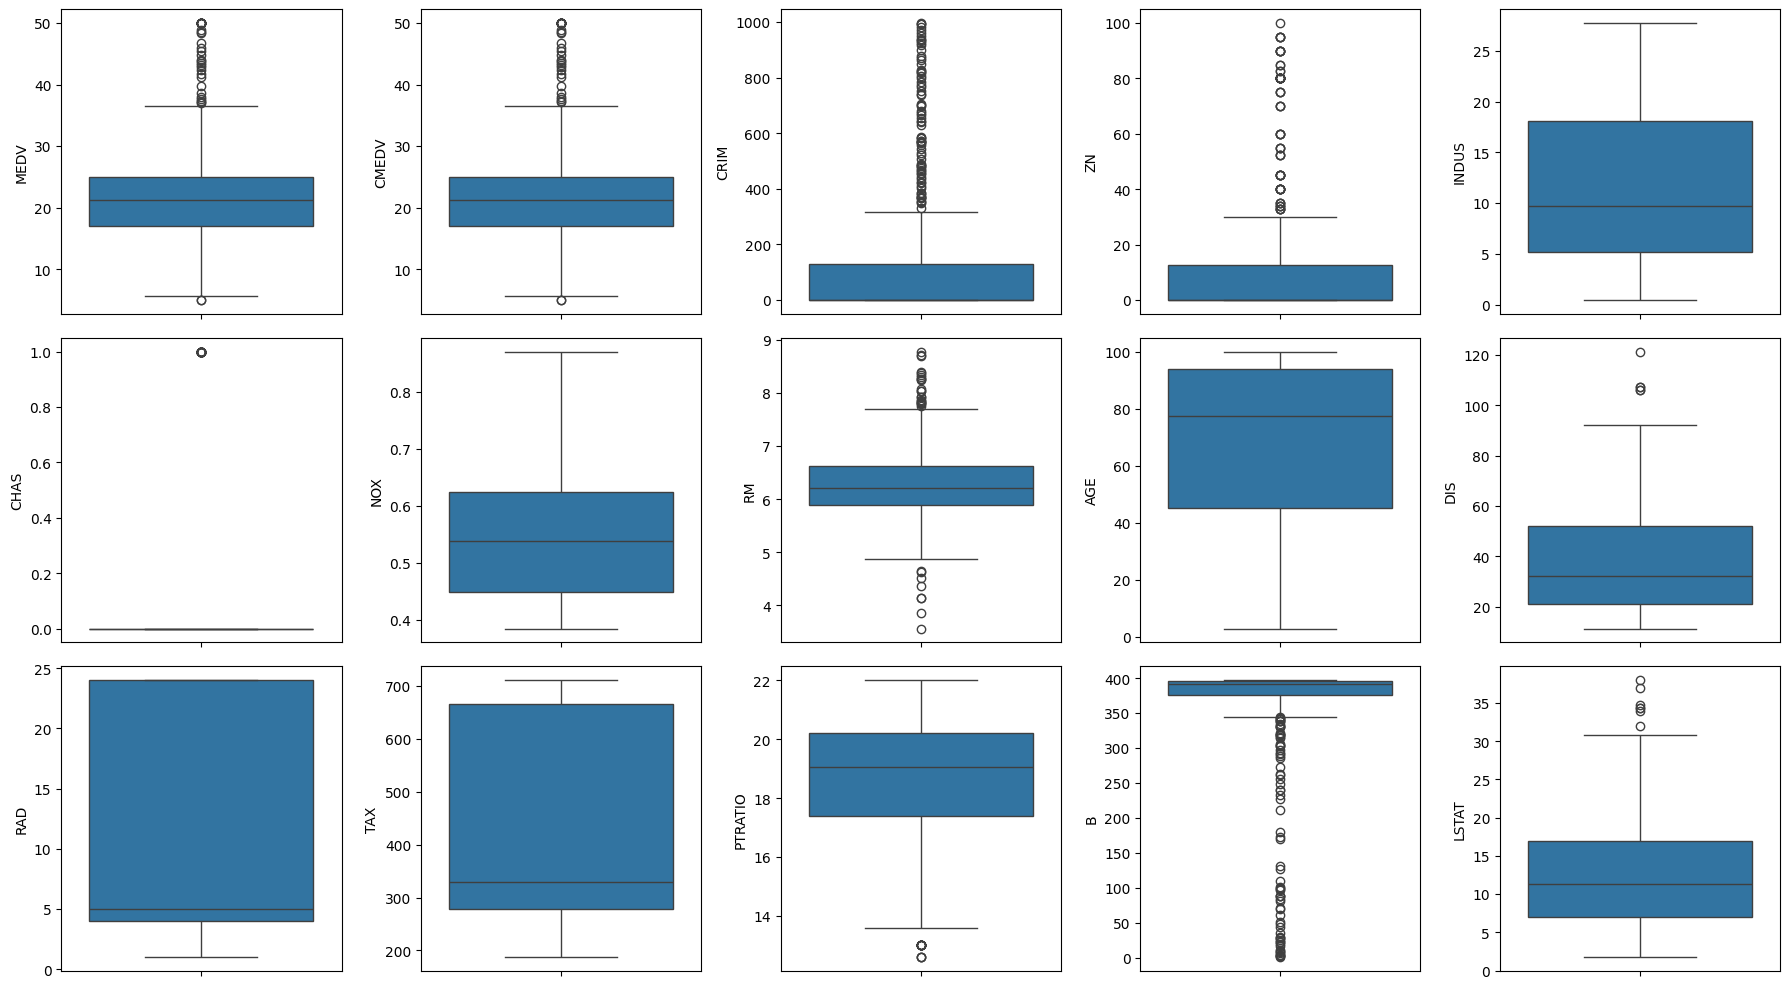

In [ ]:
# Crear boxplots para detectar outliers
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(original_numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])

plt.tight_layout()
plt.show()

In [ ]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column TOWN# outliers = 0.00%
Column MEDV outliers = 4.49%
Column CMEDV outliers = 4.49%
Column CRIM outliers = 14.90%
Column ZN outliers = 13.27%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.69%
Column AGE outliers = 0.00%
Column DIS outliers = 1.02%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.65%
Column B outliers = 15.92%
Column LSTAT outliers = 1.43%


In [ ]:
df = df[~(df['MEDV'] >= 50.0)]

# 6. Exportar el DataFrame final a CSV


In [ ]:

df.to_csv('../csv/boston_eda_final.csv', index=False)